# Table of Contents
**[`1. Named Entity Recognition with NLTK and SpaCy`](#1)**<br>
**[`2. Named Entity Recognition and Classification for Entity Extraction`](#2)**<br>

### [`1. Named Entity Recognition with NLTK and SpaCy`](https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da)<a name = '1'></a>


Named entity recognition (NER)is probably the first step towards information extraction that seeks to locate and classify named entities in text into pre-defined categories such as the names of persons, organizations, locations, expressions of times, quantities, monetary values, percentages, etc. NER is used in many fields in Natural Language Processing (NLP), and it can help answering many real-world questions, such as:

* Which companies were mentioned in the news article?
* Were specified products mentioned in complaints or reviews?
* Does the tweet contain the name of a person? Does the tweet contain this person’s location?

This article describes how to build named entity recognizer with NLTK and SpaCy, to identify the names of things, such as persons, organizations, or locations in the raw text. Let’s get started!



### NLTK

In [67]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [68]:
#help(pos_tag)

In [69]:
ex = 'European authorities fined Google a record $5.1 billion \
on Wednesday for abusing its power in the mobile phone market \
and ordered the company to alter its practices'

sent = 'BANK RAKYAT INDONESIA - US$ REGS, 5YR SUSTAINABILITY BOND - IPG'

In [70]:
def preprocess(sent):
    sent_token = word_tokenize(sent)
    sent_tag = pos_tag(sent_token)
    return sent_tag

In [71]:
sent_tag = preprocess(sent)
sent_tag

[('BANK', 'NNP'),
 ('RAKYAT', 'NNP'),
 ('INDONESIA', 'NNP'),
 ('-', ':'),
 ('US', 'PRP'),
 ('$', '$'),
 ('REGS', 'NNP'),
 (',', ','),
 ('5YR', 'CD'),
 ('SUSTAINABILITY', 'NNP'),
 ('BOND', 'NNP'),
 ('-', ':'),
 ('IPG', 'NN')]

#### Chunking
We get a list of tuples containing the individual words in the sentence and their associated part-of-speech.

Now we’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.

Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [66]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'
cp = nltk.RegexpParser(pattern)
#dir(cp)

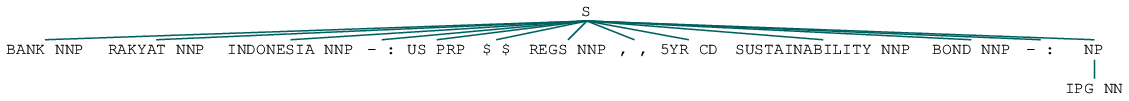

In [80]:
cs = cp.parse(sent_tag)
cs

In [81]:
print(cs)

(S
  BANK/NNP
  RAKYAT/NNP
  INDONESIA/NNP
  -/:
  US/PRP
  $/$
  REGS/NNP
  ,/,
  5YR/CD
  SUSTAINABILITY/NNP
  BOND/NNP
  -/:
  (NP IPG/NN))


IOB tags have become the standard way to represent chunk structures in files, and we will also be using this format.

In [82]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('BANK', 'NNP', 'O'),
 ('RAKYAT', 'NNP', 'O'),
 ('INDONESIA', 'NNP', 'O'),
 ('-', ':', 'O'),
 ('US', 'PRP', 'O'),
 ('$', '$', 'O'),
 ('REGS', 'NNP', 'O'),
 (',', ',', 'O'),
 ('5YR', 'CD', 'O'),
 ('SUSTAINABILITY', 'NNP', 'O'),
 ('BOND', 'NNP', 'O'),
 ('-', ':', 'O'),
 ('IPG', 'NN', 'B-NP')]


In [85]:
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  (GPE European/JJ)
  authorities/NNS
  fined/VBD
  (PERSON Google/NNP)
  a/DT
  record/NN
  $/$
  5.1/CD
  billion/CD
  on/IN
  Wednesday/NNP
  for/IN
  abusing/VBG
  its/PRP$
  power/NN
  in/IN
  the/DT
  mobile/JJ
  phone/NN
  market/NN
  and/CC
  ordered/VBD
  the/DT
  company/NN
  to/TO
  alter/VB
  its/PRP$
  practices/NNS)


In [72]:
import pandas as pd
file_path = '/Users/Stanley/Google Drive (lu.song.2017@smu.edu.sg)/GitHub/Cova/email_automate_extract/Phase1_streamline/df_parse_wenbin.csv'
df = pd.read_csv(file_path)
subjects = df['subject']

In [74]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint

def preprocess(sent):
    sent_token = word_tokenize(sent)
    sent_tag = pos_tag(sent_token)
    return sent_tag

def IOB_tag(sent_tag):
    pattern = 'NP: {<DT>?<JJ>*<NN>}'
    cp = nltk.RegexpParser(pattern)
    cs = cp.parse(sent_tag)
    iob_tagged = tree2conlltags(cs)
    return iob_tagged

for sent in subjects:
    sent_tag = preprocess(sent)
    #iob_tagged = IOB_tag(sent_tag)
    #pprint(iob_tagged)
    ne_tree = nltk.ne_chunk(sent_tag)
    pprint(ne_tree)

Tree('S', [Tree('GSP', [('NEW', 'NNP')]), Tree('GPE', [('ISSUE', 'NNP')]), ('-', ':'), Tree('ORGANIZATION', [('HANWHA', 'NNP')]), Tree('ORGANIZATION', [('TOTAL', 'NNP')]), ('-', ':'), ('US', 'PRP'), ('$', '$'), Tree('ORGANIZATION', [('REGS', 'NNP')]), (',', ','), ('5YR', 'CD'), Tree('ORGANIZATION', [('FXD', 'NNP')]), ('-', ':'), Tree('ORGANIZATION', [('INITIAL', 'NNP')]), ('PX', 'NNP'), ('GUIDANCE', 'NNP')])
Tree('S', [('NEW', 'JJ'), ('ISSUE', 'NN'), (':', ':'), ('HOUSING', 'NN'), ('AND', 'CC'), Tree('ORGANIZATION', [('DEVELOPMENT', 'NNP')]), Tree('ORGANIZATION', [('BOARD', 'NNP')]), ('SGD', 'NNP'), ('10Y', 'CD'), Tree('ORGANIZATION', [('SENIOR', 'NNP')]), ('@', 'FW'), ('2.675', 'CD'), ('%', 'NN')])
Tree('S', [Tree('ORGANIZATION', [('BANK', 'NNP')]), Tree('ORGANIZATION', [('OF', 'NNP')]), Tree('ORGANIZATION', [('COMMUNICATIONS', 'NNP')]), ('FINANCIAL', 'NNP'), ('LEASING', 'NNP'), ('CO.', 'NNP'), (',', ','), ('LTD.', 'NNP'), ('–', 'NNP'), ('INITIAL', 'NNP'), ('PRICE', 'NNP'), ('GUIDANCE

Tree('S', [Tree('ORGANIZATION', [('GUOTAI', 'NNP')]), Tree('ORGANIZATION', [('JUNAN', 'NNP')]), Tree('ORGANIZATION', [('INTERNATIONAL', 'NNP')]), Tree('ORGANIZATION', [('HOLDINGS', 'NNPS')]), Tree('ORGANIZATION', [('LTD', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('3Y', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('PRICED', 'NN')])])
Tree('S', [Tree('ORGANIZATION', [('GUOTAI', 'NNP')]), Tree('ORGANIZATION', [('JUNAN', 'NNP')]), Tree('ORGANIZATION', [('INTERNATIONAL', 'NNP')]), Tree('ORGANIZATION', [('HOLDINGS', 'NNPS')]), Tree('ORGANIZATION', [('LTD', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('3Y', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('PRICED', 'NN')])])
Tree('S', [Tree('ORGANIZATION', [('GUOTAI', 'NNP')]), Tree('ORGANIZATION', [('JUNAN', 'NNP')]), Tree('ORGANIZATION', [('INTERNATIONAL', 'NNP')]), Tree('ORGANIZATION', [('HOLDINGS', 'NNPS')]), Tree('ORGANIZATION', [('LTD', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('3Y', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('PRICED', 'NN')])])
Tree('S', [Tree(

Tree('S', [Tree('ORGANIZATION', [('MODERN', 'NNP')]), Tree('GPE', [('LAND', 'NNP')]), ('(', '('), Tree('GPE', [('CHINA', 'NNP')]), (')', ')'), ('CO.', 'NNP'), (',', ','), Tree('ORGANIZATION', [('LTD', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('1.5YR', 'CD'), Tree('ORGANIZATION', [('GREEN', 'NNP')]), Tree('ORGANIZATION', [('NOTES', 'NNP')]), ('-', ':'), Tree('ORGANIZATION', [('PRICED', 'NN')])])
Tree('S', [Tree('ORGANIZATION', [('CHANGDE', 'NNP')]), Tree('ORGANIZATION', [('URBAN', 'NNP')]), ('CONSTRUCTION', 'NNP'), ('&', 'CC'), Tree('ORGANIZATION', [('INVESTMENT', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('2Y', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('LAUNCHED', 'NN')])])
Tree('S', [Tree('ORGANIZATION', [('MODERN', 'NNP')]), Tree('GPE', [('LAND', 'NNP')]), ('(', '('), Tree('GPE', [('CHINA', 'NNP')]), (')', ')'), ('CO.', 'NNP'), (',', ','), Tree('ORGANIZATION', [('LTD', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('1.5YR', 'CD'), Tree('ORGANIZATION', [('GREEN', 'NNP')]), Tree('ORGANIZATION', [('NOTES

Tree('S', [('SHAOXING', 'NNP'), Tree('ORGANIZATION', [('CITY', 'NNP')]), Tree('ORGANIZATION', [('INVESTMENT', 'NNP')]), ('GROUP', 'NNP'), Tree('ORGANIZATION', [('LIMITED', 'NNP')]), ('-', ':'), ('US', 'PRP'), ('$', '$'), ('3-YEAR', 'JJ'), Tree('ORGANIZATION', [('FINAL', 'NNP')]), ('PRICE', 'NNP'), ('GUIDANCE', 'NNP')])
Tree('S', [Tree('ORGANIZATION', [('GUANGZHOU', 'NNP')]), Tree('ORGANIZATION', [('METRO', 'NNP')]), ('GROUP', 'NNP'), ('CO.', 'NNP'), (',', ','), Tree('GPE', [('LTD.', 'NNP')]), ('-', ':'), Tree('ORGANIZATION', [('FINAL', 'NNP')]), ('PRICE', 'NNP'), ('GUIDANCE', 'NNP')])
Tree('S', [Tree('ORGANIZATION', [('GUANGZHOU', 'NNP')]), Tree('ORGANIZATION', [('METRO', 'NNP')]), ('GROUP', 'NNP'), ('CO.', 'NNP'), (',', ','), Tree('GPE', [('LTD.', 'NNP')]), ('-', ':'), Tree('ORGANIZATION', [('FINAL', 'NNP')]), ('PRICE', 'NNP'), ('GUIDANCE', 'NNP')])
Tree('S', [Tree('ORGANIZATION', [('GUANGZHOU', 'NNP')]), Tree('ORGANIZATION', [('METRO', 'NNP')]), ('GROUP', 'NNP'), ('CO.', 'NNP'), (','

Tree('S', [Tree('ORGANIZATION', [('CITIC', 'NNP')]), Tree('ORGANIZATION', [('SECURITIES', 'NNP')]), ('-', ':'), ('USD', 'VBZ'), ('3YR', 'CD'), Tree('ORGANIZATION', [('INITIAL', 'NNP')]), ('PRICE', 'NNP'), ('GUIDANCE', 'NNP')])
Tree('S', [Tree('ORGANIZATION', [('CITIC', 'NNP')]), Tree('ORGANIZATION', [('SECURITIES', 'NNP')]), ('-', ':'), ('USD', 'VBZ'), ('3YR', 'CD'), Tree('ORGANIZATION', [('INITIAL', 'NNP')]), ('PRICE', 'NNP'), ('GUIDANCE', 'NNP')])
Tree('S', [Tree('ORGANIZATION', [('VANKE', 'NNP')]), Tree('ORGANIZATION', [('REAL', 'NNP')]), Tree('ORGANIZATION', [('ESTATE', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('5.25YR', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('INITIAL', 'NNP')]), ('PRICE', 'NNP'), ('GUIDANCE', 'NNP')])
Tree('S', [Tree('ORGANIZATION', [('HUAIBEI', 'NNP')]), Tree('ORGANIZATION', [('CITY', 'NNP')]), ('CONSTRUCTION', 'NNP'), ('INVESTMENT', 'NNP'), ('HOLDING', 'NNP'), ('US', 'NNP'), ('$', '$'), ('3Y', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('PRICED', 'NN')])])
Tree('S'

Tree('S', [Tree('ORGANIZATION', [('YANZHOU', 'NNP')]), Tree('ORGANIZATION', [('COAL', 'NNP')]), ('MINING', 'NNP'), ('US', 'NNP'), ('$', '$'), ('3Y', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('PRICED', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('275m', 'CD'), ('@', 'NNP'), ('6.00', 'CD'), ('%', 'NN')])
Tree('S', [Tree('ORGANIZATION', [('YANZHOU', 'NNP')]), Tree('ORGANIZATION', [('COAL', 'NNP')]), ('MINING', 'NNP'), ('US', 'NNP'), ('$', '$'), ('3Y', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('LAUNCHED', 'NNP')]), ('US', 'NNP'), ('$', '$'), ('275M', 'CD'), ('@', 'NNP'), ('6.00', 'CD'), ('%', 'NN')])
Tree('S', [Tree('ORGANIZATION', [('BANK', 'NNP')]), Tree('ORGANIZATION', [('OF', 'NNP'), ('CHINA', 'NNP')]), ('TOKYO', 'NNP'), Tree('ORGANIZATION', [('BRANCH', 'NNP')]), ('–', 'NNP'), ('CNH', 'NNP'), ('2YR', 'CD'), ('–', 'NN'), Tree('ORGANIZATION', [('PRICED', 'NNP')])])
Tree('S', [Tree('ORGANIZATION', [('BANK', 'NNP')]), Tree('ORGANIZATION', [('OF', 'NNP'), ('CHINA', 'NNP')]), ('TOKYO', 'NNP'), Tre

Tree('S', [Tree('ORGANIZATION', [('BANK', 'NNP')]), Tree('ORGANIZATION', [('OF', 'NNP'), ('CHINA', 'NNP')]), ('LIMITED', 'NNP'), (',', ','), Tree('ORGANIZATION', [('MACAU', 'NNP')]), Tree('ORGANIZATION', [('BRANCH', 'NNP')]), ('–', 'NNP'), ('USD', 'NNP'), ('3Y/5Y', 'CD'), ('FRN', 'NNP'), ('–', 'NN'), Tree('ORGANIZATION', [('PRICED', 'NNP')])])
Tree('S', [Tree('ORGANIZATION', [('BANK', 'NNP')]), Tree('ORGANIZATION', [('OF', 'NNP'), ('CHINA', 'NNP')]), ('LIMITED', 'NNP'), (',', ','), Tree('ORGANIZATION', [('MACAU', 'NNP')]), Tree('ORGANIZATION', [('BRANCH', 'NNP')]), ('–', 'NNP'), ('USD', 'NNP'), ('3Y/5Y', 'CD'), ('FRN', 'NNP'), ('–', 'NN'), Tree('ORGANIZATION', [('PRICED', 'NNP')])])
Tree('S', [Tree('ORGANIZATION', [('BANK', 'NNP')]), Tree('ORGANIZATION', [('OF', 'NNP'), ('CHINA', 'NNP')]), ('LIMITED', 'NNP'), (',', ','), Tree('ORGANIZATION', [('HONG', 'NNP')]), ('KONG', 'NNP'), Tree('ORGANIZATION', [('BRANCH', 'NNP')]), ('–', 'NNP'), ('CNH', 'NNP'), ('3Y', 'CD'), ('FXD', 'NNP'), ('–', 

Tree('S', [('€€', 'NN'), ('ING', 'NNP'), ('Groep', 'NNP'), ('N.V.', 'NNP'), ('-', ':'), Tree('ORGANIZATION', [('Inaugural', 'JJ')]), ('EUR1.5bn', 'NNP'), ('12YR', 'CD'), ('Green', 'NNP'), ('Sr', 'NNP'), Tree('ORGANIZATION', [('HoldCo', 'NNP')]), ('-', ':'), ('Priced', 'VBD'), ('€€', 'NN')])
Tree('S', [Tree('ORGANIZATION', [('HUNAN', 'NNP')]), Tree('ORGANIZATION', [('XIANGJIANG', 'NNP')]), ('NEW', 'NNP'), ('AREA', 'NNP'), ('(', '('), ('Baa3/BBB', 'NNP'), (')', ')'), ('-', ':'), Tree('ORGANIZATION', [('FPG', 'NN')])])
Tree('S', [Tree('ORGANIZATION', [('CLIFFORD', 'NNP')]), Tree('ORGANIZATION', [('CAPITAL', 'NNP')]), ('W/', 'NNP'), ('GTEE', 'NNP'), ('BY', 'NNP'), ('GOVT', 'NNP'), ('OF', 'NNP'), ('SINGAPORE-NEW', 'NNP'), ('3YR', 'CD'), ('-', ':'), Tree('ORGANIZATION', [('PRICED', 'NN')])])
Tree('S', [Tree('PERSON', [('Huayuan', 'NNP')]), Tree('ORGANIZATION', [('Property', 'NNP')]), ('USD', 'NNP'), ('3NPNC2', 'CD'), ('-', ':'), ('Priced', 'VBD')])
Tree('S', [Tree('PERSON', [('Huayuan', 'NNP

In [118]:
from nltk.tree import Tree
text = subjects[0]
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(text)))
print(text)
for i in ne_tree:
    print('---------------------------------------------------')
    print(i)
    if isinstance(i, Tree):
        print(i.leaves())
        #print(" ".join([token for token, pos in i.leaves()]))

NEW ISSUE - HANWHA TOTAL - US$ REGS, 5YR FXD - INITIAL PX GUIDANCE
---------------------------------------------------
(GSP NEW/NNP)
[('NEW', 'NNP')]
---------------------------------------------------
(GPE ISSUE/NNP)
[('ISSUE', 'NNP')]
---------------------------------------------------
('-', ':')
---------------------------------------------------
(ORGANIZATION HANWHA/NNP)
[('HANWHA', 'NNP')]
---------------------------------------------------
(ORGANIZATION TOTAL/NNP)
[('TOTAL', 'NNP')]
---------------------------------------------------
('-', ':')
---------------------------------------------------
('US', 'PRP')
---------------------------------------------------
('$', '$')
---------------------------------------------------
(ORGANIZATION REGS/NNP)
[('REGS', 'NNP')]
---------------------------------------------------
(',', ',')
---------------------------------------------------
('5YR', 'CD')
---------------------------------------------------
(ORGANIZATION FXD/NNP)
[('FXD', 'NNP')]

In [120]:
dir(ne_tree[3])

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_frozen_class',
 '_get_node',
 '_label',
 '_parse_error',
 '_pformat_flat',
 '_repr_png_',
 '_set_node',
 'append',
 'chomsky_normal_form',
 'clear',
 'collapse_unary',
 'convert',
 'copy',
 'count',
 'draw',
 'extend',
 'flatten',
 'freeze',
 'fromstring',
 'height',
 'index',
 'insert',
 'label',
 'leaf_treeposition',
 'leaves',
 'node',
 'pformat',
 'pformat_latex_qtree',
 'pop',
 'pos',
 'pprint',
 'pretty_print',
 'produ

In [147]:
ne_tree[3].label()

'ORGANIZATION'

In [134]:
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

def get_continuous_chunks(text):
    chunked = ne_chunk(pos_tag(word_tokenize(text)))
    continuous_chunk = []
    current_chunk = []
    current_label = []
    for i in chunked:
        if type(i) == Tree:
            current_chunk.append(" ".join([token for token, pos in i.leaves()]))
            current_label.append(i._label)
            current_label.append(i._label)
        elif current_chunk:
            named_entity = " ".join(current_chunk)
            if named_entity not in continuous_chunk:
                continuous_chunk.append((named_entity, current_label))
                current_chunk = []
                current_label = []
        else:
            continue
    return continuous_chunk

In [135]:
get_continuous_chunks("Barack Obama is the husband of Michelle Obama.")

[('Barack Obama', ['PERSON', 'ORGANIZATION']), ('Michelle Obama', ['PERSON'])]

In [144]:
for idx, sub in enumerate(subjects):
    print('{} --- {}'.format(idx, sub))
    ent = [(e[0], e[1]) for e in get_continuous_chunks(sub)  if 'ORGANIZATION' in e[1]]
    print(ent)

0 --- NEW ISSUE - HANWHA TOTAL - US$ REGS, 5YR FXD - INITIAL PX GUIDANCE
[('HANWHA TOTAL', ['ORGANIZATION', 'ORGANIZATION']), ('REGS', ['ORGANIZATION']), ('FXD', ['ORGANIZATION']), ('INITIAL', ['ORGANIZATION'])]
1 --- NEW ISSUE: HOUSING AND DEVELOPMENT BOARD SGD 10Y SENIOR @ 2.675%
[('DEVELOPMENT BOARD', ['ORGANIZATION', 'ORGANIZATION']), ('SENIOR', ['ORGANIZATION'])]
2 --- BANK OF COMMUNICATIONS FINANCIAL LEASING CO., LTD.  – INITIAL PRICE GUIDANCE
[('BANK OF COMMUNICATIONS', ['ORGANIZATION', 'ORGANIZATION', 'ORGANIZATION'])]
3 --- ALAM SUTERA US$ REG S 2.25NC1.25 – INITIAL PRICE GUIDANCE 12% AREA
[('ALAM SUTERA', ['ORGANIZATION', 'ORGANIZATION']), ('REG', ['ORGANIZATION'])]
4 --- ZHENRO PROPERTIES US$ 10.50% 2020 TAP - IPG
[('ZHENRO PROPERTIES', ['ORGANIZATION', 'ORGANIZATION']), ('TAP', ['ORGANIZATION'])]
5 --- CHINA AOYUAN US$ REG S 3NC2  SENIOR NOTES – PX GUIDANCE
[('CHINA AOYUAN', ['GPE', 'ORGANIZATION']), ('REG', ['ORGANIZATION']), ('SENIOR', ['ORGANIZATION'])]
6 --- ZHENRO PROP

[('MODERN LAND', ['ORGANIZATION', 'GPE']), ('LTD', ['ORGANIZATION']), ('GREEN NOTES', ['ORGANIZATION', 'ORGANIZATION'])]
98 --- CHANGDE URBAN CONSTRUCTION & INVESTMENT US$ 2Y - LAUNCHED
[('CHANGDE URBAN', ['ORGANIZATION', 'ORGANIZATION']), ('INVESTMENT', ['ORGANIZATION'])]
99 --- MODERN LAND (CHINA) CO., LTD US$ 1.5YR GREEN NOTES - LAUNCHED
[('MODERN LAND', ['ORGANIZATION', 'GPE']), ('LTD', ['ORGANIZATION']), ('GREEN NOTES', ['ORGANIZATION', 'ORGANIZATION'])]
100 --- MODERN LAND (CHINA) CO., LTD US$ 1.5YR GREEN NOTES - LAUNCHED
[('MODERN LAND', ['ORGANIZATION', 'GPE']), ('LTD', ['ORGANIZATION']), ('GREEN NOTES', ['ORGANIZATION', 'ORGANIZATION'])]
101 --- MODERN LAND (CHINA) CO., LTD US$ 1.5YR GREEN NOTES - LAUNCHED
[('MODERN LAND', ['ORGANIZATION', 'GPE']), ('LTD', ['ORGANIZATION']), ('GREEN NOTES', ['ORGANIZATION', 'ORGANIZATION'])]
102 --- CHANGDE URBAN CONSTRUCTION & INVESTMENT US$ 2Y SENIOR BONDS - FPG
[('CHANGDE URBAN', ['ORGANIZATION', 'ORGANIZATION']), ('INVESTMENT', ['ORGANIZAT

[('HUAIBEI CITY', ['ORGANIZATION', 'ORGANIZATION'])]
189 --- HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING US$ 3Y - FPG
[('HUAIBEI CITY', ['ORGANIZATION', 'ORGANIZATION'])]
190 --- KWG 9.850% SENIOR NOTES DUE 2020 REG S TAP – PRICED
[('SENIOR', ['ORGANIZATION']), ('REG', ['ORGANIZATION'])]
191 --- €€€ Nykredit Realkredit A/S - EUR 500mn FRN 01-01-2024 Covered PRICED €€€
[('Nykredit Realkredit', ['ORGANIZATION']), ('EUR', ['ORGANIZATION'])]
192 --- SUNAC 8.625% 07/2020 REG S TAP - PRICED
[('REG', ['ORGANIZATION']), ('TAP', ['ORGANIZATION'])]
193 --- SUNAC 8.625% 07/2020 REG S TAP - LAUNCHED 350MM @ 9.125%
[('REG', ['ORGANIZATION']), ('TAP', ['ORGANIZATION'])]
194 --- SUNAC 8.625% 07/2020 REG S TAP - FPG  @ 9.125% (#)
[('REG', ['ORGANIZATION']), ('TAP', ['ORGANIZATION']), ('FPG', ['ORGANIZATION'])]
195 --- HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING US$ 3Y - IPG
[('HUAIBEI CITY', ['ORGANIZATION', 'ORGANIZATION'])]
196 --- HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING US$ 3Y - IPG
[('HUAIB

[('BANK OF CHINA', ['ORGANIZATION', 'ORGANIZATION']), ('MACAU BRANCH', ['ORGANIZATION', 'ORGANIZATION'])]
279 --- BANK OF CHINA LIMITED, HONG KONG BRANCH – HKD 2Y FXD PRICED
[('BANK OF CHINA', ['ORGANIZATION', 'ORGANIZATION']), ('HONG', ['ORGANIZATION']), ('BRANCH', ['ORGANIZATION']), ('FXD', ['ORGANIZATION'])]
280 --- BANK OF CHINA LIMITED, HONG KONG BRANCH – HKD 2Y FXD LAUNCHED
[('BANK OF CHINA', ['ORGANIZATION', 'ORGANIZATION']), ('HONG', ['ORGANIZATION']), ('BRANCH', ['ORGANIZATION']), ('FXD', ['ORGANIZATION'])]
281 --- BANK OF CHINA LIMITED, HONG KONG BRANCH – CNH 3Y FXD – Launched
[('BANK OF CHINA', ['ORGANIZATION', 'ORGANIZATION']), ('HONG', ['ORGANIZATION']), ('BRANCH', ['ORGANIZATION'])]
282 --- BANK OF CHINA LIMITED, HONG KONG BRANCH – CNH 3Y FXD – Launched
[('BANK OF CHINA', ['ORGANIZATION', 'ORGANIZATION']), ('HONG', ['ORGANIZATION']), ('BRANCH', ['ORGANIZATION'])]
283 --- BANK OF CHINA LIMITED, MACAU BRANCH – USD 3Y/5Y FRN – LAUNCHED
[('BANK OF CHINA', ['ORGANIZATION', 'OR

### SpaCy

In [87]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [88]:
doc = nlp('European authorities fined Google a record $5.1 billion \
on Wednesday for abusing its power in the mobile phone market and \
ordered the company to alter its practices')
pprint([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'),
 ('Google', 'ORG'),
 ('$5.1 billion', 'MONEY'),
 ('Wednesday', 'DATE')]


In [91]:
for subject in subjects:
    doc = nlp(subject)
    pprint('-----------------------------------------------------------')
    pprint(subject)
    pprint([(X.text, X.label_) for X in doc.ents])

'-----------------------------------------------------------'
'NEW ISSUE - HANWHA TOTAL - US$ REGS, 5YR FXD - INITIAL PX GUIDANCE'
[('5YR', 'CARDINAL'), ('FXD - INITIAL', 'PERSON')]
'-----------------------------------------------------------'
'NEW ISSUE: HOUSING AND DEVELOPMENT BOARD SGD 10Y SENIOR @ 2.675%'
[('NEW ISSUE: HOUSING AND DEVELOPMENT BOARD', 'ORG'),
 ('SENIOR', 'ORG'),
 ('2.675%', 'PERCENT')]
'-----------------------------------------------------------'
'BANK OF COMMUNICATIONS FINANCIAL LEASING CO., LTD.  – INITIAL PRICE GUIDANCE'
[('BANK OF COMMUNICATIONS FINANCIAL LEASING CO', 'ORG'), ('LTD', 'ORG')]
'-----------------------------------------------------------'
'ALAM SUTERA US$ REG S 2.25NC1.25 – INITIAL PRICE GUIDANCE 12% AREA'
[('12%', 'PERCENT')]
'-----------------------------------------------------------'
'ZHENRO PROPERTIES US$ 10.50% 2020 TAP - IPG'
[('ZHENRO PROPERTIES', 'PERSON'),
 ('10.50%', 'PERCENT'),
 ('2020', 'DATE'),
 ('TAP - IPG', 'ORG')]
'----------------

'-----------------------------------------------------------'
'GUOTAI JUNAN INTERNATIONAL HOLDINGS LTD US$ 3Y - FPG'
[('GUOTAI JUNAN INTERNATIONAL HOLDINGS LTD', 'ORG'), ('US$ 3Y - FPG', 'MONEY')]
'-----------------------------------------------------------'
'€€€ ING 7y Holdco - IPTs €€€'
[('€€€', 'MONEY')]
'-----------------------------------------------------------'
'REPUBLIC OF THE PHILIPPINES US$ 10YR - PX GUIDANCE T+130 BPS AREA'
[('PHILIPPINES', 'GPE'),
 ('10YR', 'MONEY'),
 ('PX', 'ORG'),
 ('GUIDANCE', 'PRODUCT'),
 ('BPS AREA', 'LOC')]
'-----------------------------------------------------------'
'GUOTAI JUNAN INTERNATIONAL HOLDINGS LTD US$ 3Y - IPG'
[('GUOTAI JUNAN INTERNATIONAL HOLDINGS LTD', 'ORG'), ('3Y', 'MONEY')]
'-----------------------------------------------------------'
'GUOTAI JUNAN INTERNATIONAL HOLDINGS LTD US$ 3Y - IPG'
[('GUOTAI JUNAN INTERNATIONAL HOLDINGS LTD', 'ORG'), ('3Y', 'MONEY')]
'-----------------------------------------------------------'
'GUOTAI JUNAN IN

'-----------------------------------------------------------'
'CIFI HOLDINGS (GROUP) CO. LTD. US$ SENIOR NOTES – INITIAL PRICE GUIDANCE'
[('CIFI HOLDINGS (GROUP) CO', 'ORG'),
 ('LTD', 'NORP'),
 ('US$ SENIOR NOTES', 'MONEY')]
'-----------------------------------------------------------'
'CIFI HOLDINGS (GROUP) CO. LTD. US$ SENIOR NOTES – INITIAL PRICE GUIDANCE'
[('CIFI HOLDINGS (GROUP) CO', 'ORG'),
 ('LTD', 'NORP'),
 ('US$ SENIOR NOTES', 'MONEY')]
'-----------------------------------------------------------'
'REDSUN PROPERTIES US$ 13.5% SENIOR NOTES DUE 2020 TAP - FPG'
[('US$ 13.5% SENIOR NOTES', 'MONEY'), ('2020', 'DATE'), ('TAP - FPG', 'PERSON')]
'-----------------------------------------------------------'
'ZHENGZHOU METRO GROUP US$ 3Y  – PRICED'
[('ZHENGZHOU METRO GROUP', 'ORG'), ('3Y', 'MONEY')]
'-----------------------------------------------------------'
'ZHENGZHOU METRO GROUP US$ 3Y  – PRICED'
[('ZHENGZHOU METRO GROUP', 'ORG'), ('3Y', 'MONEY')]
'----------------------------------

'-----------------------------------------------------------'
'CITIC SECURITIES - USD 3YR INITIAL PRICE GUIDANCE'
[]
'-----------------------------------------------------------'
'VANKE REAL ESTATE US$ 5.25YR - INITIAL PRICE GUIDANCE'
[('VANKE REAL ESTATE', 'ORG'), ('5.25YR', 'MONEY')]
'-----------------------------------------------------------'
'HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING US$ 3Y - PRICED'
[('HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING', 'ORG'), ('3Y', 'MONEY')]
'-----------------------------------------------------------'
'HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING US$ 3Y -LAUNCHED'
[('HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING', 'ORG'), ('3Y', 'MONEY')]
'-----------------------------------------------------------'
'HUAIBEI CITY CONSTRUCTION INVESTMENT HOLDING US$ 3Y - FPG'
[('HUAIBEI CITY CONSTRUCTION INVESTMENT', 'ORG'), ('3Y', 'MONEY')]
'-----------------------------------------------------------'
'KWG 9.850% SENIOR NOTES DUE 2020 REG S TAP – PRICED'
[('9.85

'-----------------------------------------------------------'
'€€€ New BPCE SFH 8yr:  PRICED  €€€'
[('PRICED', 'PERSON'), ('€€€', 'MONEY')]
'-----------------------------------------------------------'
'SHANGHAI PUDONG DEVELOPMENT BANK SINGAPORE BRANCH 3Y FRN US$ - PRICED'
[('SHANGHAI PUDONG DEVELOPMENT BANK SINGAPORE BRANCH', 'ORG'),
 ('3Y', 'CARDINAL'),
 ('FRN', 'ORG')]
'-----------------------------------------------------------'
'TIMES CHINA HOLDINGS US$ 2YR - FPG @ 11% (THE NUMBER)'
[('TIMES CHINA', 'ORG'), ('2YR', 'MONEY'), ('FPG', 'ORG'), ('11%', 'PERCENT')]
'-----------------------------------------------------------'
'TIMES CHINA HOLDINGS US$ 2YR - FPG @ 11% (THE NUMBER)'
[('TIMES CHINA', 'ORG'), ('2YR', 'MONEY'), ('FPG', 'ORG'), ('11%', 'PERCENT')]
'-----------------------------------------------------------'
'SHANGHAI PUDONG DEVELOPMENT BANK SINGAPORE BRANCH 3Y FRN US$ - FPG'
[('SHANGHAI PUDONG DEVELOPMENT BANK SINGAPORE BRANCH', 'ORG'),
 ('3Y', 'CARDINAL'),
 ('FRN', 'ORG')]

'-----------------------------------------------------------'
'★★ INDUSTRIAL BANK HK BRANCH - USD & EUR REGS GREEN - IPG  ★★'
[('★ INDUSTRIAL BANK HK BRANCH', 'ORG'), ('USD &', 'ORG')]
'-----------------------------------------------------------'
'PRICED - New DB 2yr Indonesian Rupiah Benchmark'
[('2yr', 'ORDINAL'), ('Indonesian', 'NORP')]
'-----------------------------------------------------------'
'FOUNDER SECURITIES (HONG KONG) - US$ 2YR REGS - PRICED'
[('HONG KONG', 'GPE'), ('2YR', 'MONEY'), ('REGS', 'GPE')]
'-----------------------------------------------------------'
'FOUNDER SECURITIES (HONG KONG) - US$ 2YR REGS - LAUNCHED'
[('HONG KONG', 'GPE'), ('2YR', 'MONEY'), ('REGS', 'GPE')]
'-----------------------------------------------------------'
'FOUNDER SECURITIES (HONG KONG) - US$ 2YR REGS - FPG @ 6.9%'
[('HONG KONG', 'GPE'),
 ('2YR', 'MONEY'),
 ('REGS', 'GPE'),
 ('FPG', 'ORG'),
 ('6.9%', 'PERCENT')]
'-----------------------------------------------------------'
'HUNAN XIANGJIANG 

In [110]:
for subject in subjects:
    doc = nlp(subject)
    pprint('-----------------------------------------------------------')
    displacy.render(doc, jupyter=True, style='ent')

'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


/Users/Stanley/anaconda3/lib/python3.6/runpy.py:193: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  "__main__", mod_spec)


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


'-----------------------------------------------------------'


#### Token

"B" means the token begins an entity, "I" means it is inside an entity, "O" means it is outside an entity, and "" means no entity tag is set.

In [92]:
pprint([(X, X.ent_iob_, X.ent_type_) for X in doc])

[(ING, 'B', 'ORG'),
 (Groep, 'I', 'ORG'),
 (N.V., 'I', 'ORG'),
 (-, 'I', 'ORG'),
 (Inaugural, 'I', 'ORG'),
 (EUR, 'I', 'ORG'),
 (&, 'I', 'ORG'),
 (USD, 'O', ''),
 (Green, 'O', ''),
 (HoldCo, 'O', ''),
 (Senior, 'O', ''),
 (IPT, 'O', '')]


#### Extracting named entity from an article

In [93]:
from bs4 import BeautifulSoup
import requests
import re
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
len(article.ents)

193

In [95]:
pprint([(X.text, X.label_) for X in article.ents])

[('Peter Strzok', 'PERSON'),
 ('Who Criticized Trump', 'PERSON'),
 ('Fired', 'GPE'),
 ('The New York '
  'Times                                                                                 ',
  'ORG'),
 ('InLog', 'GPE'),
 ('InToday', 'DATE'),
 ('PaperPolitics|F.B.I. Agent', 'ORG'),
 ('Peter Strzok', 'PERSON'),
 ('Who Criticized Trump', 'PERSON'),
 ('Peter Strzok', 'PERSON'),
 ('Who Criticized Trump', 'PERSON'),
 ('F.B.I.', 'GPE'),
 ('Trump', 'PERSON'),
 ('CreditCreditT.J. Kirkpatrick', 'PERSON'),
 ('The New York TimesBy Adam Goldman', 'ORG'),
 ('Michael S. SchmidtAug', 'PERSON'),
 ('13', 'CARDINAL'),
 ('2018WASHINGTON', 'CARDINAL'),
 ('Peter Strzok', 'PERSON'),
 ('F.B.I.', 'GPE'),
 ('Trump', 'PERSON'),
 ('Hillary Clinton', 'PERSON'),
 ('Russia', 'GPE'),
 ('Strzok', 'PERSON'),
 ('Monday', 'DATE'),
 ('2016', 'DATE'),
 ('F.B.I.', 'GPE'),
 ('Lisa Page — in', 'PERSON'),
 ('Russia', 'GPE'),
 ('Strzok', 'PERSON'),
 ('20 years', 'DATE'),
 ('F.B.I.', 'GPE'),
 ('the early months', 'DATE'),
 (

In [97]:
labels = [x.label_ for x in article.ents]
Counter(labels)

Counter({'PERSON': 83,
         'GPE': 38,
         'ORG': 28,
         'DATE': 30,
         'CARDINAL': 5,
         'EVENT': 1,
         'NORP': 5,
         'ORDINAL': 1,
         'WORK_OF_ART': 1,
         'LOC': 1})

In [98]:
items = [x.text for x in article.ents]
Counter(items).most_common(3)

[('Strzok', 32), ('F.B.I.', 17), ('Trump', 10)]

In [99]:
sentences = [x for x in article.sents]
print(sentences[20])

Firing Mr. Strzok, however, removes a favorite target of Mr. Trump from the ranks of the F.B.I. and gives Mr. Bowdich and the F.B.I. director, Christopher A. Wray, a chance to move beyond the president’s ire.


In [100]:
displacy.render(nlp(str(sentences[20])), jupyter=True, style='ent')

In [105]:
displacy.render(nlp(str(sentences[20])), 
                style='dep', 
                jupyter = True, 
                options = {'distance': 120})

In [106]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentences[20])) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('Firing', 'VERB', 'fire'),
 ('Mr.', 'PROPN', 'mr.'),
 ('Strzok', 'PROPN', 'strzok'),
 ('removes', 'VERB', 'remove'),
 ('favorite', 'ADJ', 'favorite'),
 ('target', 'NOUN', 'target'),
 ('Mr.', 'PROPN', 'mr.'),
 ('Trump', 'PROPN', 'trump'),
 ('ranks', 'NOUN', 'rank'),
 ('F.B.I.', 'PROPN', 'f.b.i.'),
 ('gives', 'VERB', 'give'),
 ('Mr.', 'PROPN', 'mr.'),
 ('Bowdich', 'PROPN', 'bowdich'),
 ('F.B.I.', 'PROPN', 'f.b.i.'),
 ('director', 'NOUN', 'director'),
 ('Christopher', 'PROPN', 'christopher'),
 ('A.', 'PROPN', 'a.'),
 ('Wray', 'PROPN', 'wray'),
 ('chance', 'NOUN', 'chance'),
 ('president', 'NOUN', 'president'),
 ('’s', 'PART', '’s'),
 ('ire', 'NOUN', 'ire')]

In [107]:
dict([(str(x), x.label_) for x in nlp(str(sentences[20])).ents])

{'Strzok': 'PERSON',
 'Trump': 'PERSON',
 'F.B.I.': 'GPE',
 'Bowdich': 'PERSON',
 'Christopher A. Wray': 'PERSON'}

In [108]:
print([(x, x.ent_iob_, x.ent_type_) for x in sentences[20]])

[(Firing, 'O', ''), (Mr., 'O', ''), (Strzok, 'B', 'PERSON'), (,, 'O', ''), (however, 'O', ''), (,, 'O', ''), (removes, 'O', ''), (a, 'O', ''), (favorite, 'O', ''), (target, 'O', ''), (of, 'O', ''), (Mr., 'O', ''), (Trump, 'B', 'PERSON'), (from, 'O', ''), (the, 'O', ''), (ranks, 'O', ''), (of, 'O', ''), (the, 'O', ''), (F.B.I., 'B', 'GPE'), (and, 'O', ''), (gives, 'O', ''), (Mr., 'O', ''), (Bowdich, 'B', 'PERSON'), (and, 'O', ''), (the, 'O', ''), (F.B.I., 'B', 'GPE'), (director, 'O', ''), (,, 'O', ''), (Christopher, 'B', 'PERSON'), (A., 'I', 'PERSON'), (Wray, 'I', 'PERSON'), (,, 'O', ''), (a, 'O', ''), (chance, 'O', ''), (to, 'O', ''), (move, 'O', ''), (beyond, 'O', ''), (the, 'O', ''), (president, 'O', ''), (’s, 'O', ''), (ire, 'O', ''), (., 'O', '')]


In [109]:
displacy.render(article, jupyter=True, style='ent')

In [111]:
email_str = "NOT FOR PUBLICATION OR DISTRIBUTION, DIRECTLY OR INDIRECTLY, IN OR INTO THE UNITED STATES OR TO ANY PERSONS IN ANY OTHER JURISDICTION IN WHICH SUCH PUBLICATION OR DISTRIBUTION WOULD BE PROHIBITED BY APPLICABLE LAW.\n\n** BANK RAKYAT INDONESIA - US$ REGS, 5YR SUSTAINABILITY BOND - FPG **\n\nISSUER:               PT Bank Rakyat Indonesia (Persero) Tbk (“the Issuer”)\nEXP. ISSUE RATINGS:   Baa2 (Moody’s) / BBB- (Fitch)\nFORMAT:               Reg S, Cat 1 \nSTATUS:               Fixed Rate, Senior Unsecured, Sustainability Bonds\nTENOR:                5-year\nSIZE:                 USD Benchmark\nMATURITY DATE:        28 March 2024\nSETTLE DATE:          28 March 2019, T+5\nFPG:                  T+170bps (+/-2bps)\nUSE OF PROCEEDS:      The net proceeds of the issue of the Bonds will be used \n                      by the Issuer towards financing and/or refinancing the \n                      Eligible Projects of the Issuer, as defined in the \n                      Issuer’s Sustainability Bond Framework\nCHANGE OF CONTROL:    Change of Control put at 101% if (A) the Government of \n                      the Republic of Indonesia ceases to be the ultimate owner \n                      (either directly or indirectly) of (x) at least 51 per \n                      cent. of the Issuer’s issued and paid-up share capital \n                      and/or (y) the Class A Dwiwarna Share (or other similar \n                      special share granting control over the Issuer) or (B) \n                      the rights and benefits attending to the Class A Dwiwarna \n                      Share as at the Issue Date are materially and adversely \n                      changed \nDENOMINATIONS:        USD 200,000 x USD 1,000 \nLISTING:              SGX-ST\nGOVERNING LAW:        English Law\nJLMs/JBRs:            Citigroup (B&D), Crédit Agricole CIB\nTIMING:               As early as today's business\n\n\nFCA/ICMA stabilisation applies.\n\nNotification under Section 309B(1)(c) of the Securities and Futures Act (Chapter 289) of Singapore (the “SFA”) - In connection with Section 309B of the SFA and the Securities and Futures (Capital Markets Products) Regulations 2018 (the “CMP Regulations 2018”), the Issuer has determined, and hereby notifies all relevant persons (as defined in Section 309A(1) of the SFA), that the Bonds are ‘prescribed capital markets products’ (as defined in the CMP Regulations 2018) and Excluded Investment Products (as defined in MAS Notice SFA 04-N12: Notice on the Sale of Investment Products and MAS Notice FAA-N16: Notice on Recommendations on Investment Products).\n\nThis information is subject to change and does not purport to be a complete description of the Bonds or the offering.\n\nTHIS NOTICE IS CONFIDENTIAL AND SOLELY FOR THE USE OF THE PERSON IT IS ADDRESSED AND ITS ADVISORS.  THIS ANNOUNCEMENT IS NOT AND DOES NOT CONSTITUTE OR FORM A PART OF, AND SHOULD NOT BE CONSTRUED AS, ANY OFFER, SOLICITATION OR INVITATION TO SELL, ISSUE, PURCHASE OR SUBSCRIBE FOR, ANY SECURITIES OF THE ISSUER IN OR INTO THE UNITED STATES OR ANY OTHER JURISDICTION IN WHICH SUCH OFFER OR SOLICITATION WOULD BE UNLAWFUL. IF ANY OFFFERING PROCEEDS, THE SECURITIES WILL ONLY BE OFFERED AND SOLD OUTSIDE THE UNITED STATES IN RELIANCE ON REGULATION S (“REGULATION S”) UNDER THE U.S. SECURITIES ACT OF 1933, AS AMENDED (THE “SECURITIES ACT”). NO SECURITIES MAY BE OFFERED, SOLD OR DELIVERED IN THE UNITED STATES ABSENT REGISTRATION EXCEPT PURSUANT TO AN EXEMPTION FROM, OR IN A TRANSACTION NOT SUBJECT TO, THE REGISTRATION REQUIREMENTS OF THE SECURITIES ACT AND APPLICABLE STATE OR LOCAL SECURITIES LAWS. ANY OFFERING OF SECURITIES WILL BE MADE BY MEANS OF AN OFFERING CIRCULAR. SUCH OFFERING CIRCULAR WILL CONTAIN DETAILED INFORMATION ABOUT THE ISSUER MAKING THE OFFER AND ITS MANAGEMENT, AS WELL AS FINANCIAL STATEMENTS. NO ACTION HAS BEEN TAKEN IN ANY JURISDICTION THAT WOULD PERMIT A PUBLIC OFFERING TO OCCUR IN ANY JURISDICTION. NEITHER THIS ANNOUNCEMENT NOR ANY PORTION HEREOF MAY BE SENT OR DISTRIBUTED IN OR INTO THE UNITED STATES OR IN OR INTO ANY JURISDICTION WHERE IT IS UNLAWFUL TO DO SO. ANY FAILURE TO COMPLY WITH THESE RESTRICTIONS MAY RESULT IN A VIOLATION OF THE SECURITIES ACT OR THE APPLICABLE LAWS, REGULATIONS AND GUIDELINES OF OTHER JURISDICTIONS. NO MONEY, SECURITIES OR OTHER CONSIDERATION IS BEING SOLICITED BY THIS ANNOUNCEMENT OR THE INFORMATION CONTAINED HEREIN AND, IF SENT IN RESPONSE TO THIS ANNOUNCEMENT OR THE INFORMATION CONTAINED HEREIN, WILL NOT BE ACCEPTED. NEITHER THIS COMMUNICATION NOR ANY INFORMATION HEREIN NOR THE FACT OF ITS DISTRIBUTION SHALL FORM THE BASIS OF, OR BE RELIED ON IN CONNECTION WITH, ANY CONTRACT OR COMMITMENT OR INVESTMENT DECISION WHATSOEVER. THE ISSUER DOES NOT INTEND TO REGISTER ANY SECURITIES IN THE UNITED STATES OR TO CONDUCT A PUBLIC OFFERING OF SECURITIES IN THE UNITED STATES, AND NO PUBLIC OFFERING OF SECURITIES WILL BE MADE IN THE UNITED STATES OR IN ANY OTHER JURISDICTION WHERE SUCH AN OFFERING IS RESTRICTED OR PROHIBITED. THIS NOTICE DOES NOT CONSTITUTE A PUBLIC OFFERING IN INDONESIA UNDER LAW NUMBER 8 OF 1995 REGARDING CAPITAL MARKET. A RATING IS NOT A RECOMMENDATION TO BUY, SELL OR HOLD SECURITIES AND MAY BE SUBJECT TO SUSPENSION, REDUCTION OR WITHDRAWAL AT ANY TIME BY THE RATING AGENCY.  \n\nANY DISCLAIMERS OR OTHER NOTICES THAT MAY APPEAR BELOW ARE NOT APPLICABLE TO THIS COMMUNICATION AND SHOULD BE DISREGARDED.  SUCH DISCLAIMERS OR OTHER NOTICES WERE AUTOMATICALLY GENERATED AS A RESULT OF THIS COMMUNICATION BEING SENT VIA BLOOMBERG OR ANOTHER EMAIL SYSTEM."

In [112]:
displacy.render(nlp(email_str), jupyter=True, style='ent')

### [`2. Named Entity Recognition and Classification for Entity Extraction`](https://medium.com/district-data-labs/named-entity-recognition-and-classification-for-entity-extraction-6f23342aa7c5)<a name = '2'></a>

* Preparing semi-structured natural language data for ingestion using regular expressions; creating a custom corpus in the Natural Language Toolkit
* Using a suite of open source NERC tools to extract entities and store them in JSON format
* Comparing the performance of the NERC tools
* Implementing a simplistic ensemble classifier

In [1]:
import os
BASE = '/Users/Stanley/Google Drive (lu.song.2017@smu.edu.sg)/GitHub/Machine Learning \
and Deep Learning/MachineLearning_notes_projects/NLTK'
#BASE = os.path.join(os.path.dirname(__file__), "..") # Find the parent folder of __file__

In [2]:
DOCS = os.path.join(BASE, 'OMAS_attachment')

In [3]:
def get_documents(path=DOCS):
    """
    Returns a filtered list of paths to PDF files representing our corpus.
    """
    for name in os.listdir(path):
        if name.endswith('.pdf'):
            yield os.path.join(path, name)
# Print the total number of documents

In [4]:
list(get_documents())[0]

'/Users/Stanley/Google Drive (lu.song.2017@smu.edu.sg)/GitHub/Machine Learning and Deep Learning/MachineLearning_notes_projects/NLTK/OMAS_attachment/Hon Hai Prelim OC.pdf'

### Creating a Custom NLTK Corpus
We used several Python tools to ingest our data, including the following libraries:

* [`Pdfminer`](https://github.com/pdfminer/pdfminer.six) — contains a command line tool called “pdf2txt.py” that extracts text contents from a PDF file (you can visit the pdfminer homepage for download instructions).

* `Subprocess` — a standard library module that allows us to invoke the “pdf2txt.py” command line tool within our code.
* `NLTK` — the Natural Language Tool Kit, or NLTK, serves as one of Python’s leading platforms to analyze natural language data.
* `String` — provides variable substitutions and value formatting to strip non-printable characters from the output of the text extracted from our journal article PDFs.
* `Unicodedata` — allows Latin Unicode characters to degrade gracefully into ASCII. This is an important feature because some Unicode characters won’t extract nicely.

In [5]:
import re
import nltk
import codecs
import string
import subprocess
import unicodedata

## Create a path to extract the corpus.
CORPUS = os.path.join(BASE, 'corpus')

def extract_corpus(docs=DOCS, corpus=CORPUS):
    """
    Extracts a text corpus from the PDF documents and writes them to disk.
    """
    # Create corpus directory if it doesn't exist.
    if not os.path.exists(corpus):
        os.mkdir(corpus)
        
    # For each PDF path, use pdf2txt to extract the text file.
    for path in get_documents(docs):
        # Call the subprocess command (must be on your path)
        document = subprocess.check_output(
            ['pdf2txt.py', path]
        )
        # Encode UTF-u and remove non-printable characters
        document = filter(
            lambda char: char in string.printable,
            unicodedata.normalize('NFKD', document.decode('utf-8'))
        )
        # Write the document out to the corpus directory
        fname = os.path.splitext(os.path.basename(path))[0] + ".txt"
        outpath = os.path.join(corpus, fname)
        with codecs.open(outpath, 'w') as f:
            f.write(''.join(list(document)))
# Run the extraction
extract_corpus()

In [7]:
path = list(get_documents())[0]

In [8]:
os.path.basename(path)

'Hon Hai Prelim OC.pdf'

In [10]:
os.path.splitext(os.path.basename(path))[0]

'Hon Hai Prelim OC'

In [11]:
path = list(get_documents())[0]
document = subprocess.check_output(
            ['pdf2txt.py', path]
        )

In [12]:
document

b' \n\nIMPORTANT NOTICE \n\nNOT FOR DISTRIBUTION TO ANY PERSON OR ADDRESS IN THE UNITED STATES \n\nIMPORTANT: You must read the following disclaimer before continuing. The following disclaimer applies to \nthe attached preliminary pricing supplement. You are advised to read this disclaimer carefully before accessing, \nreading or making any other use of the attached preliminary pricing supplement. In accessing the attached preliminary \npricing supplement, you agree to be bound by the following terms and conditions, including any modifications to \nthem from time to time, each time you receive any information from us as a result of such access. \n\nNOTHING IN THIS ELECTRONIC TRANSMISSION CONSTITUTES AN OFFER OF SECURITIES FOR SALE \nIN THE UNITED STATES OR ANY OTHER JURISDICTION WHERE IT IS UNLAWFUL TO DO SO. THE \nSECURITIES  HAVE  NOT  BEEN,  AND  WILL  NOT  BE,  REGISTERED  UNDER  THE  UNITED  STATES \nSECURITIES ACT OF 1933, AS AMENDED (THE \xe2\x80\x9cSECURITIES ACT\xe2\x80\x9d), 

In [13]:
type(document)

bytes

In [14]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [15]:
utf_8 = document.decode('utf-8')

In [16]:
unicode = unicodedata.normalize('NFKD', document.decode('utf-8'))

In [17]:
utf_8 == unicode

True

In [18]:
document_filter = filter(
            lambda char: char in string.printable,
            unicodedata.normalize('NFKD', document.decode('utf-8')))

In [19]:
''.join(list(document_filter))

' \n\nIMPORTANT NOTICE \n\nNOT FOR DISTRIBUTION TO ANY PERSON OR ADDRESS IN THE UNITED STATES \n\nIMPORTANT: You must read the following disclaimer before continuing. The following disclaimer applies to \nthe attached preliminary pricing supplement. You are advised to read this disclaimer carefully before accessing, \nreading or making any other use of the attached preliminary pricing supplement. In accessing the attached preliminary \npricing supplement, you agree to be bound by the following terms and conditions, including any modifications to \nthem from time to time, each time you receive any information from us as a result of such access. \n\nNOTHING IN THIS ELECTRONIC TRANSMISSION CONSTITUTES AN OFFER OF SECURITIES FOR SALE \nIN THE UNITED STATES OR ANY OTHER JURISDICTION WHERE IT IS UNLAWFUL TO DO SO. THE \nSECURITIES  HAVE  NOT  BEEN,  AND  WILL  NOT  BE,  REGISTERED  UNDER  THE  UNITED  STATES \nSECURITIES ACT OF 1933, AS AMENDED (THE SECURITIES ACT), OR THE SECURITIES LAWS OF

**Next, we build a custom NLTK corpus. Having our target documents loaded as an NLTK corpus brings the power of NLTK to our analysis goals.**

In [20]:
# Create an NLTK corpus reader to access text data on disk.                
kddcorpus = nltk.corpus.PlaintextCorpusReader(CORPUS, '.*\.txt')

In [21]:
help(kddcorpus)

Help on PlaintextCorpusReader in module nltk.corpus.reader.plaintext object:

class PlaintextCorpusReader(nltk.corpus.reader.api.CorpusReader)
 |  Reader for corpora that consist of plaintext documents.  Paragraphs
 |  are assumed to be split using blank lines.  Sentences and words can
 |  be tokenized using the default tokenizers, or by custom tokenizers
 |  specificed as parameters to the constructor.
 |  
 |  This corpus reader can be customized (e.g., to skip preface
 |  sections of specific document formats) by creating a subclass and
 |  overriding the ``CorpusView`` class variable.
 |  
 |  Method resolution order:
 |      PlaintextCorpusReader
 |      nltk.corpus.reader.api.CorpusReader
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, root, fileids, word_tokenizer=WordPunctTokenizer(pattern='\\w+|[^\\w\\s]+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>), sent_tokenizer=<nltk.tokenize.punkt.PunktSentenceTokenizer o

We now have a semi-structured dataset in a format that we can query and analyze. First, let’s see how many words (including stop words) we have in our entire corpus and the vocabulary of the corpus.

In [22]:
dir(kddcorpus)

['CorpusView',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_encoding',
 '_fileids',
 '_get_root',
 '_para_block_reader',
 '_read_para_block',
 '_read_sent_block',
 '_read_word_block',
 '_root',
 '_sent_tokenizer',
 '_tagset',
 '_word_tokenizer',
 'abspath',
 'abspaths',
 'citation',
 'encoding',
 'ensure_loaded',
 'fileids',
 'license',
 'open',
 'paras',
 'raw',
 'readme',
 'root',
 'sents',
 'unicode_repr',
 'words']

In [23]:
words = nltk.FreqDist(kddcorpus.words())
words

FreqDist({'the': 258, ',': 186, 'of': 169, '.': 142, '(': 127, 'and': 100, ')': 100, 'to': 91, 'or': 91, 'in': 91, ...})

In [24]:
count = sum(words.values())
vocab = len(words)
print("Corpus contains a vocabulary of {} and a word count of {}.".format(vocab, count))

Corpus contains a vocabulary of 1142 and a word count of 5135.


In [25]:
kddcorpus.fileids()
#kddcorpus.sents()

['Hon Hai Prelim OC.txt',
 'Xinhu Zongbao - HKEX Announcement Open Market Purchases pdf.txt']

### Using Regular Expressions to Extract Specific Sections

### Open Source NERC Tools
* NLTK has a chunk package that uses NLTK’s recommended named entity chunker to chunk the given list of tagged tokens. A string is tokenized and tagged with parts of speech (POS) tags. The NLTK chunker then identifies non-overlapping groups and assigns them to an entity class. You can read more about NLTK's chunking capabilities in the NLTK book.
* Stanford’s Named Entity Recognizer, often called Stanford NER, is a Java implementation of linear chain Conditional Random Field (CRF) sequence models functioning as a Named Entity Recognizer. Named Entity Recognition (NER) labels sequences of words in a text that are the names of things, such as person and company names, or gene and protein names. NLTK contains an interface to Stanford NER written by Nitin Madnani. Details for using the Stanford NER tool are on the NLTK page and the required jar files can be downloaded here.
* Polyglot is a natural language pipeline that supports massive multilingual (i.e. language) applications. It supports tokenization in 165 languages, language detection in 196 languages, named entity recognition in 40 languages, part of speech tagging in 16 languages, sentiment analysis in 136 languages, word embeddings in 137 languages, morphological analysis in 135 languages, and transliteration in 69 languages. It is a powerhouse tool for natural language processing. We will use the named entity recognition feature for English language in this exercise. Polyglot is available via pypi.

* [`Python: polyglot - ModuleNotFoundError: No module named 'icu'`](https://markhneedham.com/blog/2017/11/28/python-polyglot-modulenotfounderror-no-module-named-icu/)

In [145]:
from collections import defaultdict

from nltk import ne_chunk
from polyglot.text import Text
from nltk.tag import StanfordNERTagger

ModuleNotFoundError: No module named 'icu'

In [27]:
from collections import defaultdict

results = defaultdict(lambda: defaultdict(list))
results

defaultdict(<function __main__.<lambda>()>, {})

In [28]:
def stanford_entities(model, jar, fileids=None, corpus=kddcorpus, section = None):
    """
    Extract entities using the Stanford NER tagger.
    Must pass in the path to the tagging model and jar as downloaded from the
    Stanford Core NLP website.
    """
    results = defaultdict(lambda: defaultdict(list))
    fileids = fileids or corpus.fileids()
    tagger  = StanfordNERTagger(model, jar)
    section = section
    for fileid in fileids:
        if section is not None:
            text = nltk.word_tokenize(list(sectpull([fileid],section=section))[0][1])
        else:
            text  = corpus.words(fileid)
        chunk = []
        for token, tag in tagger.tag(text):
            if tag == 'O':
                if chunk:
                    # Flush the current chunk
                    etext =  " ".join([c[0] for c in chunk])
                    etag  = chunk[0][1]
                    chunk = []
                    if etag == 'PERSON':
                        key = 'persons'
                    elif etag == 'ORGANIZATION':
                        key = 'organizations'
                    elif etag == 'LOCATION':
                        key = 'locations'
                    else:
                        key = 'other'
                    results[fileid][key].append(etext)
            else:
                # Build chunk from tags
                chunk.append((token, tag))
    return results

def nltk_entities(fileids=None, section = None,corpus=kddcorpus):
    """
    Extract entities using the NLTK named entity chunker.
    """
    results = defaultdict(lambda: defaultdict(list))
    fileids = fileids or corpus.fileids()
    for fileid in fileids:
        if section is not None:
            text = nltk.pos_tag(nltk.word_tokenize(list(sectpull([fileid],section=section))[0][1]))
        else:
            text = nltk.pos_tag(corpus.words(fileid))
        for entity in nltk.ne_chunk(text):
            if isinstance(entity, nltk.tree.Tree):
                etext = " ".join([word for word, tag in entity.leaves()])
                label = entity.label()
            else:
                continue
            if label == 'PERSON':
                key = 'persons'
            elif label == 'ORGANIZATION':
                key = 'organizations'
            elif label == 'LOCATION':
                key = 'locations'
            elif label == 'GPE':
                key = 'other'
            else:
                key = None
            if key:
                results[fileid][key].append(etext)
    return results

In [29]:
# Only extract our annotated files.
#fids  = ['p19.txt', 'p29.txt']
# NLTK Entities
#nltkents = nltk_entities(fids, section='top')
# Polyglot Entities
#polyents = polyglot_entities(fids, section='top')
# Stanford Model Loading
#root  = os.path.expanduser('~/models/stanford-ner-2014-01-04/')
#model = os.path.join(root, 'classifiers/english.muc.7class.distsim.crf.ser.gz')
#jar   = os.path.join(root, 'stanford-ner-2014-01-04.jar')
# Stanford Entities
#stanents = stanford_entities(model, jar, fids, section='top')

In [30]:
model =  os.path.join(os.getcwd(),'english.muc.7class.distsim.crf.ser.gz')
jar = os.path.join(os.getcwd(), 'stanford-ner-2014-01-04.jar')

In [146]:
model

'/Users/Stanley/Google Drive (lu.song.2017@smu.edu.sg)/GitHub/Machine Learning and Deep Learning/MachineLearning_notes_projects/NLTK/english.muc.7class.distsim.crf.ser.gz'

In [31]:
tagger  = StanfordNERTagger(model, jar)

In [32]:
for fileid in kddcorpus.fileids():
    print(fileid)
    text = kddcorpus.words(fileid)
    print(text)

Hon Hai Prelim OC.txt
['IMPORTANT', 'NOTICE', 'NOT', 'FOR', 'DISTRIBUTION', ...]
Xinhu Zongbao - HKEX Announcement Open Market Purchases pdf.txt
['Hong', 'Kong', 'Exchanges', 'and', 'Clearing', ...]


In [36]:
help(tagger)

Help on StanfordNERTagger in module nltk.tag.stanford object:

class StanfordNERTagger(StanfordTagger)
 |  A class for Named-Entity Tagging with Stanford Tagger. The input is the paths to:
 |  
 |  - a model trained on training data
 |  - (optionally) the path to the stanford tagger jar file. If not specified here,
 |    then this jar file must be specified in the CLASSPATH envinroment variable.
 |  - (optionally) the encoding of the training data (default: UTF-8)
 |  
 |  Example:
 |  
 |      >>> from nltk.tag import StanfordNERTagger
 |      >>> st = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz') # doctest: +SKIP
 |      >>> st.tag('Rami Eid is studying at Stony Brook University in NY'.split()) # doctest: +SKIP
 |      [('Rami', 'PERSON'), ('Eid', 'PERSON'), ('is', 'O'), ('studying', 'O'),
 |       ('at', 'O'), ('Stony', 'ORGANIZATION'), ('Brook', 'ORGANIZATION'),
 |       ('University', 'ORGANIZATION'), ('in', 'O'), ('NY', 'LOCATION')]
 |  
 |  Method resolution order:


In [38]:
tagger.tag(text)

[('Hong', 'O'),
 ('Kong', 'O'),
 ('Exchanges', 'O'),
 ('and', 'O'),
 ('Clearing', 'O'),
 ('Limited', 'O'),
 ('and', 'O'),
 ('The', 'O'),
 ('Stock', 'O'),
 ('Exchange', 'O'),
 ('of', 'O'),
 ('Hong', 'LOCATION'),
 ('Kong', 'LOCATION'),
 ('Limited', 'O'),
 ('take', 'O'),
 ('no', 'O'),
 ('responsibility', 'O'),
 ('for', 'O'),
 ('the', 'O'),
 ('contents', 'O'),
 ('of', 'O'),
 ('this', 'O'),
 ('announcement', 'O'),
 (',', 'O'),
 ('make', 'O'),
 ('no', 'O'),
 ('representation', 'O'),
 ('as', 'O'),
 ('to', 'O'),
 ('its', 'O'),
 ('accuracy', 'O'),
 ('or', 'O'),
 ('completeness', 'O'),
 ('and', 'O'),
 ('expressly', 'O'),
 ('disclaim', 'O'),
 ('any', 'O'),
 ('liability', 'O'),
 ('whatsoever', 'O'),
 ('for', 'O'),
 ('any', 'O'),
 ('loss', 'O'),
 ('howsoever', 'O'),
 ('arising', 'O'),
 ('from', 'O'),
 ('or', 'O'),
 ('in', 'O'),
 ('reliance', 'O'),
 ('upon', 'O'),
 ('the', 'O'),
 ('whole', 'O'),
 ('or', 'O'),
 ('any', 'O'),
 ('part', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('contents', 'O'),
 ('of', 'O'

In [45]:
from nltk import word_tokenize

In [46]:
tagger.tag(word_tokenize(subjects[0]))

[('NEW', 'O'),
 ('ISSUE', 'O'),
 ('-', 'O'),
 ('HANWHA', 'ORGANIZATION'),
 ('TOTAL', 'ORGANIZATION'),
 ('-', 'O'),
 ('US', 'LOCATION'),
 ('$', 'O'),
 ('REGS', 'O'),
 (',', 'O'),
 ('5YR', 'O'),
 ('FXD', 'O'),
 ('-', 'O'),
 ('INITIAL', 'O'),
 ('PX', 'O'),
 ('GUIDANCE', 'O')]

In [58]:
tagger.tag(word_tokenize(subjects[100]))

[('MODERN', 'O'),
 ('LAND', 'O'),
 ('(', 'O'),
 ('CHINA', 'LOCATION'),
 (')', 'O'),
 ('CO.', 'O'),
 (',', 'O'),
 ('LTD', 'LOCATION'),
 ('US', 'LOCATION'),
 ('$', 'O'),
 ('1.5YR', 'O'),
 ('GREEN', 'O'),
 ('NOTES', 'O'),
 ('-', 'O'),
 ('LAUNCHED', 'O')]

In [60]:
kddcorpus.fileids()

['Hon Hai Prelim OC.txt',
 'Xinhu Zongbao - HKEX Announcement Open Market Purchases pdf.txt']

In [62]:
nltk.pos_tag(kddcorpus.words(kddcorpus.fileids()[0]))

[('IMPORTANT', 'NNP'),
 ('NOTICE', 'NNP'),
 ('NOT', 'NNP'),
 ('FOR', 'NNP'),
 ('DISTRIBUTION', 'NNP'),
 ('TO', 'NNP'),
 ('ANY', 'NNP'),
 ('PERSON', 'NNP'),
 ('OR', 'NNP'),
 ('ADDRESS', 'NNP'),
 ('IN', 'NNP'),
 ('THE', 'NNP'),
 ('UNITED', 'NNP'),
 ('STATES', 'NNPS'),
 ('IMPORTANT', 'NNP'),
 (':', ':'),
 ('You', 'PRP'),
 ('must', 'MD'),
 ('read', 'VB'),
 ('the', 'DT'),
 ('following', 'JJ'),
 ('disclaimer', 'NN'),
 ('before', 'IN'),
 ('continuing', 'VBG'),
 ('.', '.'),
 ('The', 'DT'),
 ('following', 'JJ'),
 ('disclaimer', 'NN'),
 ('applies', 'NNS'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('attached', 'VBN'),
 ('preliminary', 'JJ'),
 ('pricing', 'NN'),
 ('supplement', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ('are', 'VBP'),
 ('advised', 'VBN'),
 ('to', 'TO'),
 ('read', 'VB'),
 ('this', 'DT'),
 ('disclaimer', 'NN'),
 ('carefully', 'RB'),
 ('before', 'IN'),
 ('accessing', 'VBG'),
 (',', ','),
 ('reading', 'VBG'),
 ('or', 'CC'),
 ('making', 'VBG'),
 ('any', 'DT'),
 ('other', 'JJ'),
 ('use', 'NN'),
 ('o